## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9885766	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9685874	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9482875	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9310611	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9141730	total: 62.6ms	remaining: 12.5s
5:	learn: 0.8974838	total: 63.6ms	remaining: 10.5s
6:	learn: 0.8810202	total: 64.7ms	remaining: 9.17s
7:	learn: 0.8648949	total: 65.5ms	remaining: 8.13s
8:	learn: 0.8499578	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8329220	total: 67.1ms	remaining: 6.65s
10:	learn: 0.8185258	total: 68ms	remaining: 6.11s
11:	learn: 0.8032863	total: 69ms	remaining: 5.68s
12:	learn: 0.7881488	total: 69.8ms	remaining: 5.3s
13:	learn: 0.7734167	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7615429	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7482069	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7357988	total: 73ms	remaining: 4.22s
17:	learn: 0.7228612	total: 73.8ms	remaining: 4.03s
18:	learn: 0.7106853	total: 75.2ms	remaining: 3.88s

58:	learn: 0.4248406	total: 107ms	remaining: 1.71s
59:	learn: 0.4211115	total: 108ms	remaining: 1.69s
60:	learn: 0.4164527	total: 109ms	remaining: 1.68s
61:	learn: 0.4125577	total: 110ms	remaining: 1.66s
62:	learn: 0.4097020	total: 111ms	remaining: 1.65s
63:	learn: 0.4055086	total: 111ms	remaining: 1.63s
64:	learn: 0.4025522	total: 112ms	remaining: 1.61s
65:	learn: 0.3993750	total: 113ms	remaining: 1.6s
66:	learn: 0.3959957	total: 114ms	remaining: 1.59s
67:	learn: 0.3927837	total: 115ms	remaining: 1.57s
68:	learn: 0.3894439	total: 116ms	remaining: 1.56s
69:	learn: 0.3868179	total: 116ms	remaining: 1.55s
70:	learn: 0.3835233	total: 117ms	remaining: 1.53s
71:	learn: 0.3809700	total: 118ms	remaining: 1.52s
72:	learn: 0.3783010	total: 119ms	remaining: 1.51s
73:	learn: 0.3748747	total: 120ms	remaining: 1.5s
74:	learn: 0.3716300	total: 121ms	remaining: 1.49s
75:	learn: 0.3693638	total: 121ms	remaining: 1.48s
76:	learn: 0.3659144	total: 122ms	remaining: 1.47s
77:	learn: 0.3634534	total: 123ms

159:	learn: 0.2498460	total: 191ms	remaining: 1s
160:	learn: 0.2489551	total: 192ms	remaining: 1s
161:	learn: 0.2480473	total: 193ms	remaining: 999ms
162:	learn: 0.2471951	total: 194ms	remaining: 996ms
163:	learn: 0.2470054	total: 195ms	remaining: 993ms
164:	learn: 0.2463171	total: 196ms	remaining: 990ms
165:	learn: 0.2456363	total: 196ms	remaining: 987ms
166:	learn: 0.2451456	total: 197ms	remaining: 984ms
167:	learn: 0.2450021	total: 198ms	remaining: 981ms
168:	learn: 0.2446732	total: 199ms	remaining: 978ms
169:	learn: 0.2439631	total: 200ms	remaining: 974ms
170:	learn: 0.2432887	total: 200ms	remaining: 971ms
171:	learn: 0.2427385	total: 201ms	remaining: 968ms
172:	learn: 0.2421207	total: 202ms	remaining: 965ms
173:	learn: 0.2416899	total: 203ms	remaining: 962ms
174:	learn: 0.2410006	total: 204ms	remaining: 960ms
175:	learn: 0.2408198	total: 204ms	remaining: 957ms
176:	learn: 0.2400332	total: 205ms	remaining: 955ms
177:	learn: 0.2393348	total: 206ms	remaining: 951ms
178:	learn: 0.2387

289:	learn: 0.1905706	total: 298ms	remaining: 730ms
290:	learn: 0.1902208	total: 299ms	remaining: 729ms
291:	learn: 0.1897857	total: 300ms	remaining: 727ms
292:	learn: 0.1896295	total: 301ms	remaining: 726ms
293:	learn: 0.1892017	total: 302ms	remaining: 725ms
294:	learn: 0.1890922	total: 303ms	remaining: 724ms
295:	learn: 0.1889502	total: 303ms	remaining: 722ms
296:	learn: 0.1887062	total: 304ms	remaining: 720ms
297:	learn: 0.1883190	total: 305ms	remaining: 719ms
298:	learn: 0.1880959	total: 306ms	remaining: 717ms
299:	learn: 0.1879578	total: 307ms	remaining: 716ms
300:	learn: 0.1875895	total: 307ms	remaining: 714ms
301:	learn: 0.1872888	total: 308ms	remaining: 712ms
302:	learn: 0.1867930	total: 309ms	remaining: 711ms
303:	learn: 0.1866690	total: 310ms	remaining: 709ms
304:	learn: 0.1865795	total: 311ms	remaining: 708ms
305:	learn: 0.1860060	total: 311ms	remaining: 706ms
306:	learn: 0.1858910	total: 312ms	remaining: 705ms
307:	learn: 0.1855499	total: 313ms	remaining: 703ms
308:	learn: 

389:	learn: 0.1589486	total: 381ms	remaining: 596ms
390:	learn: 0.1586869	total: 382ms	remaining: 596ms
391:	learn: 0.1583490	total: 383ms	remaining: 594ms
392:	learn: 0.1580700	total: 384ms	remaining: 593ms
393:	learn: 0.1576611	total: 385ms	remaining: 592ms
394:	learn: 0.1574864	total: 386ms	remaining: 591ms
395:	learn: 0.1571289	total: 387ms	remaining: 590ms
396:	learn: 0.1570201	total: 388ms	remaining: 589ms
397:	learn: 0.1567649	total: 389ms	remaining: 588ms
398:	learn: 0.1563603	total: 389ms	remaining: 587ms
399:	learn: 0.1559692	total: 390ms	remaining: 585ms
400:	learn: 0.1555214	total: 391ms	remaining: 584ms
401:	learn: 0.1550717	total: 392ms	remaining: 583ms
402:	learn: 0.1549326	total: 393ms	remaining: 583ms
403:	learn: 0.1546950	total: 394ms	remaining: 582ms
404:	learn: 0.1543651	total: 395ms	remaining: 581ms
405:	learn: 0.1539332	total: 396ms	remaining: 579ms
406:	learn: 0.1538633	total: 397ms	remaining: 578ms
407:	learn: 0.1534241	total: 397ms	remaining: 577ms
408:	learn: 

513:	learn: 0.1281331	total: 488ms	remaining: 461ms
514:	learn: 0.1278950	total: 489ms	remaining: 460ms
515:	learn: 0.1278672	total: 490ms	remaining: 459ms
516:	learn: 0.1276447	total: 491ms	remaining: 458ms
517:	learn: 0.1273502	total: 492ms	remaining: 457ms
518:	learn: 0.1271273	total: 492ms	remaining: 456ms
519:	learn: 0.1268426	total: 493ms	remaining: 455ms
520:	learn: 0.1266893	total: 494ms	remaining: 454ms
521:	learn: 0.1264633	total: 495ms	remaining: 453ms
522:	learn: 0.1262916	total: 496ms	remaining: 452ms
523:	learn: 0.1259889	total: 496ms	remaining: 451ms
524:	learn: 0.1257060	total: 497ms	remaining: 450ms
525:	learn: 0.1254023	total: 498ms	remaining: 449ms
526:	learn: 0.1253639	total: 499ms	remaining: 448ms
527:	learn: 0.1251221	total: 500ms	remaining: 447ms
528:	learn: 0.1250927	total: 500ms	remaining: 446ms
529:	learn: 0.1249877	total: 501ms	remaining: 445ms
530:	learn: 0.1247059	total: 502ms	remaining: 443ms
531:	learn: 0.1243731	total: 503ms	remaining: 442ms
532:	learn: 

615:	learn: 0.1089587	total: 571ms	remaining: 356ms
616:	learn: 0.1087270	total: 572ms	remaining: 355ms
617:	learn: 0.1087106	total: 573ms	remaining: 354ms
618:	learn: 0.1084602	total: 574ms	remaining: 353ms
619:	learn: 0.1083934	total: 575ms	remaining: 352ms
620:	learn: 0.1081663	total: 576ms	remaining: 351ms
621:	learn: 0.1080191	total: 577ms	remaining: 350ms
622:	learn: 0.1076930	total: 578ms	remaining: 349ms
623:	learn: 0.1075636	total: 579ms	remaining: 349ms
624:	learn: 0.1073340	total: 579ms	remaining: 348ms
625:	learn: 0.1071049	total: 580ms	remaining: 347ms
626:	learn: 0.1070869	total: 581ms	remaining: 346ms
627:	learn: 0.1068994	total: 582ms	remaining: 345ms
628:	learn: 0.1068861	total: 583ms	remaining: 344ms
629:	learn: 0.1067015	total: 584ms	remaining: 343ms
630:	learn: 0.1066544	total: 585ms	remaining: 342ms
631:	learn: 0.1066263	total: 586ms	remaining: 341ms
632:	learn: 0.1064605	total: 587ms	remaining: 340ms
633:	learn: 0.1064222	total: 588ms	remaining: 339ms
634:	learn: 

734:	learn: 0.0912473	total: 679ms	remaining: 245ms
735:	learn: 0.0910300	total: 680ms	remaining: 244ms
736:	learn: 0.0909048	total: 680ms	remaining: 243ms
737:	learn: 0.0908159	total: 681ms	remaining: 242ms
738:	learn: 0.0905983	total: 682ms	remaining: 241ms
739:	learn: 0.0904450	total: 683ms	remaining: 240ms
740:	learn: 0.0903013	total: 684ms	remaining: 239ms
741:	learn: 0.0900414	total: 685ms	remaining: 238ms
742:	learn: 0.0898774	total: 685ms	remaining: 237ms
743:	learn: 0.0896818	total: 686ms	remaining: 236ms
744:	learn: 0.0895468	total: 687ms	remaining: 235ms
745:	learn: 0.0894448	total: 688ms	remaining: 234ms
746:	learn: 0.0892192	total: 689ms	remaining: 233ms
747:	learn: 0.0889907	total: 690ms	remaining: 232ms
748:	learn: 0.0888354	total: 690ms	remaining: 231ms
749:	learn: 0.0886349	total: 691ms	remaining: 230ms
750:	learn: 0.0884591	total: 692ms	remaining: 229ms
751:	learn: 0.0883048	total: 693ms	remaining: 228ms
752:	learn: 0.0881823	total: 694ms	remaining: 228ms
753:	learn: 

834:	learn: 0.0786038	total: 761ms	remaining: 150ms
835:	learn: 0.0785954	total: 762ms	remaining: 150ms
836:	learn: 0.0784710	total: 763ms	remaining: 149ms
837:	learn: 0.0783876	total: 764ms	remaining: 148ms
838:	learn: 0.0782103	total: 765ms	remaining: 147ms
839:	learn: 0.0780886	total: 766ms	remaining: 146ms
840:	learn: 0.0778997	total: 767ms	remaining: 145ms
841:	learn: 0.0777713	total: 767ms	remaining: 144ms
842:	learn: 0.0776456	total: 768ms	remaining: 143ms
843:	learn: 0.0776049	total: 769ms	remaining: 142ms
844:	learn: 0.0774984	total: 770ms	remaining: 141ms
845:	learn: 0.0774683	total: 771ms	remaining: 140ms
846:	learn: 0.0773482	total: 771ms	remaining: 139ms
847:	learn: 0.0773063	total: 772ms	remaining: 138ms
848:	learn: 0.0771539	total: 773ms	remaining: 137ms
849:	learn: 0.0771188	total: 774ms	remaining: 137ms
850:	learn: 0.0769814	total: 775ms	remaining: 136ms
851:	learn: 0.0768368	total: 776ms	remaining: 135ms
852:	learn: 0.0767337	total: 777ms	remaining: 134ms
853:	learn: 

962:	learn: 0.0660679	total: 869ms	remaining: 33.4ms
963:	learn: 0.0660603	total: 870ms	remaining: 32.5ms
964:	learn: 0.0659023	total: 871ms	remaining: 31.6ms
965:	learn: 0.0658670	total: 871ms	remaining: 30.7ms
966:	learn: 0.0658301	total: 872ms	remaining: 29.8ms
967:	learn: 0.0657639	total: 873ms	remaining: 28.9ms
968:	learn: 0.0655969	total: 874ms	remaining: 28ms
969:	learn: 0.0654949	total: 875ms	remaining: 27.1ms
970:	learn: 0.0653404	total: 876ms	remaining: 26.2ms
971:	learn: 0.0652659	total: 877ms	remaining: 25.3ms
972:	learn: 0.0651247	total: 878ms	remaining: 24.4ms
973:	learn: 0.0650331	total: 878ms	remaining: 23.4ms
974:	learn: 0.0649974	total: 879ms	remaining: 22.5ms
975:	learn: 0.0648891	total: 880ms	remaining: 21.6ms
976:	learn: 0.0648435	total: 881ms	remaining: 20.7ms
977:	learn: 0.0648014	total: 882ms	remaining: 19.8ms
978:	learn: 0.0647348	total: 882ms	remaining: 18.9ms
979:	learn: 0.0647284	total: 883ms	remaining: 18ms
980:	learn: 0.0646372	total: 884ms	remaining: 17.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

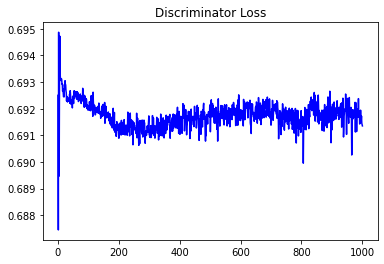

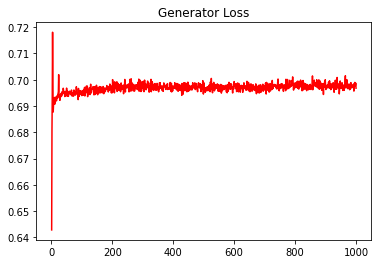

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.20263887323160706


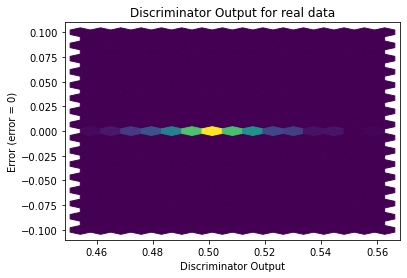

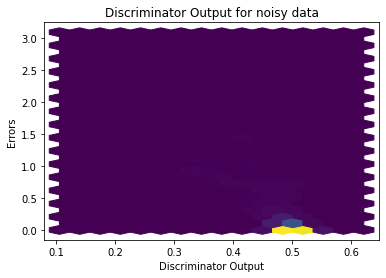

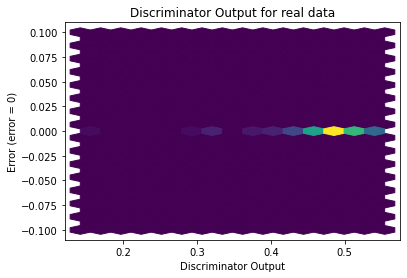

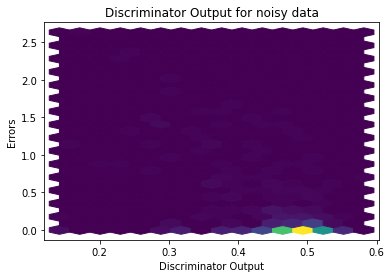

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


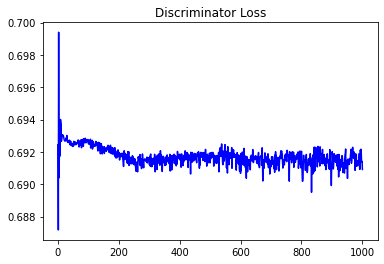

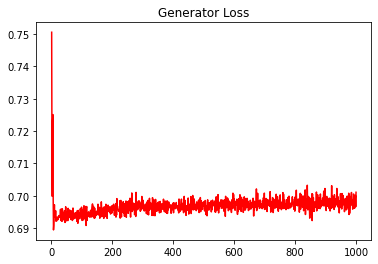

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24625588796205258


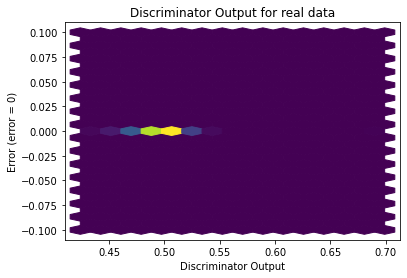

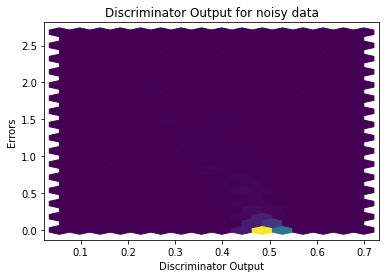

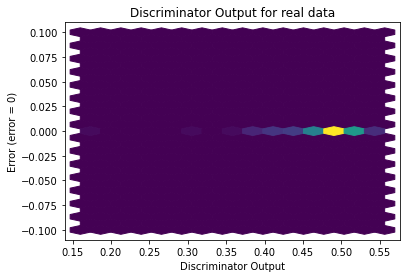

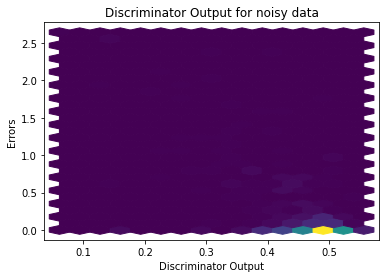

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9878]], requires_grad=True)
